Reference:
* [Linear Mixed Effects Models](https://www.statsmodels.org/stable/mixed_linear.html)
* [Linear Mixed Effects Models Examples](https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html)
* [Comparing GEE and MixedLM](https://nbviewer.jupyter.org/urls/umich.box.com/shared/static/lc6uf6dmabmitjbup3yt.ipynb)

In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import Exchangeable, Independence
from statsmodels.regression.mixed_linear_model import MixedLM

from matplotlib import pyplot as plt

# Growth curves of pigs

In [2]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data
data.head()

/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


Random effects structure not being specified

In [4]:
model = mixedlm('Weight ~ Time', data, groups=data['Pig']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            
========================================================

"""

Random intercept  & Random slope

In [5]:
model = mixedlm('Weight ~ Time', data, groups=data['Pig'], 
                re_formula='~Time').fit()
model.summary()

/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/media/h

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               5.7891    
Min. group size:   11       Likelihood:          -2220.3890
Max. group size:   12       Converged:           No        
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.672 23.438 0.000 14.423 17.055
Time              6.939    0.085 81.326 0.000  6.772  7.106
Group Var        30.266    4.271                           
Group x Time Cov  0.746    0.304                           
Time Var          0.483    0.046                           
===========================================================

"""

Uncorrelated random effects

In [6]:
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(np.ones(2), np.eye(2))
model = mixedlm('Weight ~ Time', data, groups=data['Pig'],
                re_formula='~Time').fit(free=free)
model.summary()

/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               5.8015    
Min. group size:   11       Likelihood:          -2220.0996
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.672 23.416 0.000 14.421 17.056
Time              6.939    0.084 83.012 0.000  6.775  7.103
Group Var        30.322    4.025                           
Group x Time Cov  0.000    0.000                           
Time Var          0.462    0.040                           
===========================================================

"""

# Sitka growth data

In [7]:
data = sm.datasets.get_rdataset('Sitka', 'MASS').data
data.head()

/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


size  Time  tree  treat
0  4.51   152     1  ozone
1  4.98   174     1  ozone
2  5.41   201     1  ozone
3  5.90   227     1  ozone
4  6.15   258     1  ozone

In [10]:
data['Intercept'] = 1

In [13]:
model = sm.MixedLM(data['size'], data[['Intercept', 'Time']], groups=data['tree'], exog_re=data['Intercept']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:             MixedLM Dependent Variable: size    
No. Observations:  395     Method:             REML    
No. Groups:        79      Scale:              0.0392  
Min. group size:   5       Likelihood:         -82.3884
Max. group size:   5       Converged:          Yes     
Mean group size:   5.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.273    0.088 25.864 0.000  2.101  2.446
Time          0.013    0.000 47.796 0.000  0.012  0.013
Intercept Var 0.374    0.345                           
=======================================================

"""

Add random slope.

In [16]:
model = sm.MixedLM(data['size'], data[['Intercept', 'Time']], groups=data['tree'], exog_re=data[['Intercept','Time']]).fit()
model.summary()

/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:               MixedLM    Dependent Variable:    size    
No. Observations:    395        Method:                REML    
No. Groups:          79         Scale:                 0.0264  
Min. group size:     5          Likelihood:            -62.4834
Max. group size:     5          Converged:             Yes     
Mean group size:     5.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             2.273    0.101 22.513 0.000  2.075  2.471
Time                  0.013    0.000 33.888 0.000  0.012  0.013
Intercept Var         0.646    0.914                           
Intercept x Time Cov -0.001    0.003                           
Time Var              0.000    0.000                           
===============================================================

"""

In [17]:
likev = model.profile_re(0, 're', dist_low=0.1, dist_high=0.1)

/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/media/hdd/envs/tf/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boun

Text(0, 0.5, '-2 times profile loglikelihood')

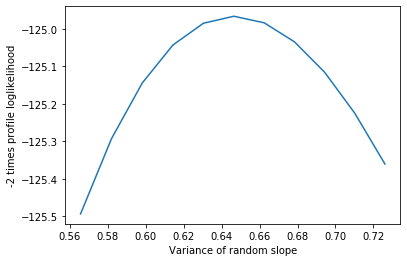

In [20]:
plt.plot(likev[:,0], 2*likev[:,1]) # chi-square reference distribution with 1 dof
plt.xlabel('Variance of random slope')
plt.ylabel('-2 times profile loglikelihood')

# Comparing GEE and MixedLM

In [24]:
fname = 'http://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/VietNamI.csv'
data = pd.read_csv(fname)
data.head()

Unnamed: 0  pharvis   lnhhexp       age     sex  married  educ  illness  \
0           1        0  2.730363  3.761200    male        1     2        1   
1           2        0  2.737248  2.944439  female        0     0        1   
2           3        0  2.266935  2.564950    male        0     4        0   
3           4        1  2.392753  3.637586  female        1     3        1   
4           5        1  3.105335  3.295837    male        1     3        1   

   injury  illdays  actdays  insurance  commune  
0       0        7        0          0      192  
1       0        4        0          0      167  
2       0        0        0          1       76  
3       0        3        0          1      123  
4       0       10        0          0      148

In [25]:
data['age'] = np.exp(data['age'])

In [27]:
data['educ'] = stats.zscore(data['educ'])

## GEE

In [34]:
ind = Independence()
fml = 'lnhhexp ~ age + sex + married + educ + insurance + injury + actdays'
model_gee = GEE.from_formula(fml, groups=data['commune'], cov_struct=ind, data=data).fit()
model_gee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     lnhhexp   No. Observations:                27765
Model:                                 GEE   No. clusters:                      194
Method:                        Generalized   Min. cluster size:                  51
                      Estimating Equations   Max. cluster size:                 206
Family:                           Gaussian   Mean cluster size:               143.1
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Tue, 10 Dec 2019   Scale:                           0.361
Covariance type:                    robust   Time:                         17:13:05
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5646      0.031     82.534      0.000       2.504       2.626
sex[T.male]    -0.0072      0.006     -1.200      0.230      -0.019       0.005
age             0.0014      0.000      3.179      0.001       0.001       0.002
married        -0.0562      0.013     -4.315      0.000      -0.082      -0.031
educ            0.1472      0.016      9.084      0.000       0.115       0.179
insurance       0.1524      0.027      5.564      0.000       0.099       0.206
injury          0.0212      0.074      0.288      0.773      -0.123       0.165
actdays        -0.0066      0.005     -1.284      0.199      -0.017       0.003
==============================================================================
Skew:                          0.4577   Kurtosis:                       0.5664
Centered skew:                 0.0407   Centered kurtosis:              0.9566
==============================================================================
"""

In [35]:
model_gee.cov_struct.summary()

'Observations within a cluster are modeled as being independent.'

In [36]:
ex = Exchangeable()
model_gee = GEE.from_formula(fml, groups=data['commune'], cov_struct=ex, data=data).fit()
model_gee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     lnhhexp   No. Observations:                27765
Model:                                 GEE   No. clusters:                      194
Method:                        Generalized   Min. cluster size:                  51
                      Estimating Equations   Max. cluster size:                 206
Family:                           Gaussian   Mean cluster size:               143.1
Dependence structure:         Exchangeable   Num. iterations:                     5
Date:                     Tue, 10 Dec 2019   Scale:                           0.364
Covariance type:                    robust   Time:                         17:15:05
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6034      0.032     82.066      0.000       2.541       2.666
sex[T.male]    -0.0050      0.004     -1.163      0.245      -0.013       0.003
age            -0.0009      0.000     -3.522      0.000      -0.001      -0.000
married         0.0172      0.009      1.960      0.050    4.87e-07       0.034
educ            0.1238      0.009     14.535      0.000       0.107       0.141
insurance       0.0881      0.014      6.522      0.000       0.062       0.115
injury          0.0409      0.046      0.886      0.376      -0.050       0.132
actdays        -0.0077      0.004     -1.983      0.047      -0.015   -9.03e-05
==============================================================================
Skew:                          0.4829   Kurtosis:                       0.5541
Centered skew:                 0.0832   Centered kurtosis:              0.9251
==============================================================================
"""

In [37]:
model_gee.cov_struct.summary()

'The correlation between two observations in the same cluster is 0.483'

## Mixed model

In [39]:
model_lme = MixedLM.from_formula(fml, groups=data['commune'], data=data).fit()
model_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: lnhhexp    
No. Observations: 27765   Method:             REML       
No. Groups:       194     Scale:              0.1822     
Min. group size:  51      Likelihood:         -16275.3317
Max. group size:  206     Converged:          Yes        
Mean group size:  143.1                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       2.603    0.032 82.309 0.000  2.541  2.665
sex[T.male]    -0.005    0.005 -0.974 0.330 -0.015  0.005
age            -0.001    0.000 -5.436 0.000 -0.001 -0.001
married         0.017    0.007  2.591 0.010  0.004  0.030
educ            0.124    0.003 40.620 0.000  0.118  0.130
insurance       0.088    0.008 11.471 0.000  0.073  0.103
injury          0.041    0.033  1.245 0.213 -0.024  0.105
actdays        -0.008    0.003 -2.682 0.007 -0.013 -0.002
Group Var       0.189    0.045                           
=========================================================

"""

## Compare

### Parameters

Text(0, 0.5, 'GEE coefficient')

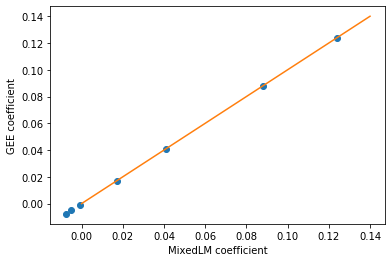

In [42]:
plt.plot(model_lme.params[1:-1], model_gee.params[1:], 'o')
plt.plot([0, 0.14], [0, 0.14], '-')
plt.xlabel("MixedLM coefficient")
plt.ylabel("GEE coefficient")

### Standard Errors

Text(0, 0.5, 'GEE SE')

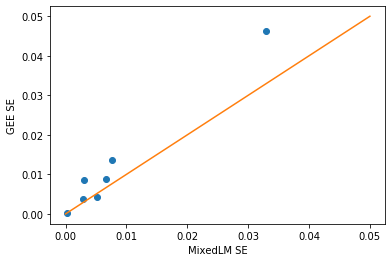

In [43]:
plt.plot(model_lme.bse[1:-1], model_gee.bse[1:], 'o')
plt.plot([0, 0.05], [0, 0.05], '-')
plt.xlabel("MixedLM SE")
plt.ylabel("GEE SE")

### Z scores

Text(0, 0.5, 'GEE Z-score')

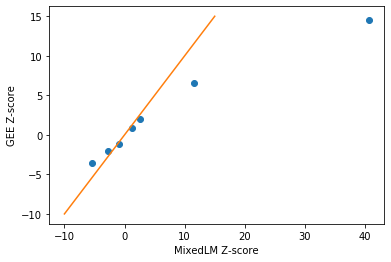

In [44]:
plt.plot(model_lme.tvalues[1:-1], model_gee.tvalues[1:], 'o')
plt.plot([-10, 15], [-10, 15], '-')
plt.xlabel("MixedLM Z-score")
plt.ylabel("GEE Z-score")